In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:

# Load the featurized data from all 10 participants across all conditions
df = pd.read_pickle("../data/featurized_data/dov_data.pkl")
df["concatenated_fv"] = df["concatenated_fv"] + df["reverb_feat"]

# Options for feat (features) are:
# concatenated_fv -> Concatenated feature vector encompassing all features
# gcc_feat -> Crispness of first wavefront
# per_wav_feat -> Voice frequency distribution

# Options for control are:
# session -> Cross session 
# geometry -> Cross placement
# room_id -> Cross room
# subject_id -> Cross subject
# utterance -> Cross utterance

# feat = "concatenated_fv"
# control = "session"

feat = "concatenated_fv"
control = "utterance"

df_group = df.groupby([control])["rotation",feat]

g_id = list(df_group.groups.keys())

In [10]:
g_id

[0.0, 1.0]

In [4]:
df

,acorr_gcc,autocorr_feat,avg_channels,concatenated_fv,distance,doa,filename,gcc_feat,geometry,per_wav_feat,position,reverb_feat,room_id,rotation,session,stat_feat,subject_id,utterance,xcorr_gcc_feat
0,"[0.21896133013069627, 0.18147738464176655, 0.1...","[1.170810888587635, 0.19729458540678002, 0.371...",0.0,"[0.0010266973179442556, 0.0010860743991526229,...",5,45,s1_downstairs_wall_trial1,"[[0.0010266973179442556, 0.0010860743991526229...",open,"[2.898223872351639, 0.5084690361864891, 0.1754...",C1,"[1.312000698717102, 3.3154717253963737, 5.8211...",1.0,0.0,1.0,"[2.692582403567252, 9, 3.5, 0.1623737265610477...",s1,0.0,"[0.9753400973665217, 1.060203367844224, 1.1450..."
1,"[0.13633061945438388, 0.18047590274363765, 0.2...","[1.3765460095500481, 0.40700997970998287, 0.66...",0.0,"[0.00033217213181088126, 0.0003289633200949582...",5,45,s1_downstairs_wall_trial1,"[[0.00033217213181088126, 0.000328963320094958...",open,"[2.242452816569435, 0.18554764545761762, 0.082...",C1,"[0.23635352569385942, 0.6581969907442735, 4.16...",1.0,45.0,1.0,"[1.7320508075688772, 6, 3.0, 0.052900963197685...",s1,0.0,"[1.0458019995130599, 1.1252696285955608, 1.204..."
2,"[0.05148196592926978, 0.02129179146140814, 0.0...","[1.2921498939131935, 0.2433098293840883, 0.348...",0.0,"[0.002731714250321672, 0.00167894224990589, 0....",5,45,s1_downstairs_wall_trial1,"[[0.002731714250321672, 0.00167894224990589, 0...",open,"[1.6346395104968627, 0.11162281332497367, 0.06...",C1,"[0.22965804136245258, 0.5863715419541866, 3.30...",1.0,90.0,1.0,"[1.5, 3, 1.5, 0.044703090661928443, 0.14559831...",s1,0.0,"[0.571480098646134, 0.6091162973704437, 0.6467..."
3,"[0.2507488392293453, 0.2416090248152614, 0.232...","[1.2519229193604982, 0.22517438931390643, 0.46...",0.0,"[5.000037934085622e-05, 0.00017944185961024032...",5,45,s1_downstairs_wall_trial1,"[[5.000037934085622e-05, 0.0001794418596102403...",open,"[1.605999645309845, 0.15394761537610838, 0.095...",C1,"[0.29659971303005056, 0.6771677888031853, 3.34...",1.0,135.0,1.0,"[1.118033988749895, 3, 3.5, 0.0509182840699184...",s1,0.0,"[0.6718124829543134, 0.6887140767648816, 0.705..."
4,"[0.04759088158607485, 0.038223249837756136, 0....","[1.3007311894729257, 0.27396903722546995, 0.58...",0.0,"[0.00012045922838400196, 0.0005541125610004313...",5,45,s1_downstairs_wall_trial1,"[[0.00012045922838400196, 0.000554112561000431...",open,"[1.9549931468208768, 0.3010762408803783, 0.154...",C1,"[0.6568399542006554, 1.7366188433138299, 3.704...",1.0,180.0,1.0,"[0.0, 0, 3.0, 0.06327406400785278, 0.200371845...",s1,0.0,"[0.6032403303931156, 0.6220218295541903, 0.640..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,"[0.4656700333580375, 0.46706193219870334, 0.46...","[1.1450765724100913, 0.1049038467463107, 0.332...",0.0,"[0.0030174752966527878, 0.002907737471778652, ...",3,0,s10_downstairs_nowall_trial2,"[[0.0030174752966527878, 0.002907737471778652,...",closed,"[1.5932580463085944, 0.08582008281079766, 0.05...",B0,"[0.053972995412428726, 0.12502588516284252, 1....",0.0,135.0,2.0,"[2.0615528128088303, 6, 3.5, 0.027169490006798...",s10,1.0,"[0.8884345153346658, 0.9028137304509679, 0.917..."
11516,"[0.2136169178411365, 0.21504145395010707, 0.21...","[1.671474636417275, 0.27849502535536896, 0.469...",0.0,"[0.002774047991838688, 0.0010297163856925033, ...",3,0,s10_downstairs_nowall_trial2,"[[0.002774047991838688, 0.0010297163856925033,...",closed,"[1.4931902054121273, 0.05474024019757224, 0.03...",B0,"[0.06856907475207379, 0.1715319224631877, 1.09...",0.0,180.0,2.0,"[2.23606797749979, 6, 2.0, 0.04077382474024689...",s10,1.0,"[0.4691572378699978, 0.4782110044422249, 0.487..."
11517,"[0.3666020426899194, 0.3638495961204171, 0.361...","[1.7044068724712864, 0.44076333194971085, 0.83...",0.0,"[0.0031048558448824133, 0.0014269659105413382,...",3,0,s10_downstairs_nowall_trial2,"[[0.0031048558448824133, 0.0014269659105413382...",closed,"[1.6475054444862882, 0.052256821321919944, 0.0...",B0,"[0.0608762217670190

In [5]:
df['concatenated_fv']

0        [0.0010266973179442556, 0.0010860743991526229,...
1        [0.00033217213181088126, 0.0003289633200949582...
2        [0.002731714250321672, 0.00167894224990589, 0....
3        [5.000037934085622e-05, 0.00017944185961024032...
4        [0.00012045922838400196, 0.0005541125610004313...
                               ...                        
11515    [0.0030174752966527878, 0.002907737471778652, ...
11516    [0.002774047991838688, 0.0010297163856925033, ...
11517    [0.0031048558448824133, 0.0014269659105413382,...
11518    [0.003763653721874019, 0.003826497321633107, 0...
11519    [0.0005383874532030457, 0.0007265763686338388,...
Name: concatenated_fv, Length: 11520, dtype: object

In [11]:
df.shape

(11520, 19)

In [23]:
df.describe()

,avg_channels,room_id,rotation,session,utterance
count,11520.0,11520.000000,11520.000000,11520.000000,11520.000000
mean,0.0,1.500000,157.500000,1.500000,0.500000
std,0.0,1.118083,103.112429,0.500022,0.500022
min,0.0,0.000000,0.000000,1.000000,0.000000
25%,0.0,0.750000,78.750000,1.000000,0.000000
50%,0.0,1.500000,157.500000,1.500000,0.500000
75%,0.0,2.250000,236.250000,2.000000,1.000000
max,0.0,3.000000,315.000000,2.000000,1.000000


In [18]:
df.loc[100]

acorr_gcc          [0.1597511861473322, 0.18627140671014786, 0.21...
autocorr_feat      [1.3479892017401265, 0.30385909369215347, 0.65...
avg_channels                                                     0.0
concatenated_fv    [0.0009550062610111086, 0.0005003395749834568,...
distance                                                           3
doa                                                               90
filename                                   s1_downstairs_wall_trial1
gcc_feat           [[0.0009550062610111086, 0.0005003395749834568...
geometry                                                        open
per_wav_feat       [1.7304637137867596, 0.10633257669553266, 0.06...
position                                                          B2
reverb_feat        [0.1298234319289546, 0.3254687194310186, 3.006...
room_id                                                          1.0
rotation                                                       180.0
session                           

In [6]:
#df.columns
#df.ndim
df.shape
# df.size

(11520, 19)

In [12]:
g_id

[0.0, 1.0]

In [15]:
df["reverb_feat"]

0        [1.312000698717102, 3.3154717253963737, 5.8211...
1        [0.23635352569385942, 0.6581969907442735, 4.16...
2        [0.22965804136245258, 0.5863715419541866, 3.30...
3        [0.29659971303005056, 0.6771677888031853, 3.34...
4        [0.6568399542006554, 1.7366188433138299, 3.704...
                               ...                        
11515    [0.053972995412428726, 0.12502588516284252, 1....
11516    [0.06856907475207379, 0.1715319224631877, 1.09...
11517    [0.060876221767019074, 0.1511413289314958, 1.4...
11518    [0.06004257035203532, 0.13139766394477537, 1.1...
11519    [0.14854491061004582, 0.3615265260474252, 1.58...
Name: reverb_feat, Length: 11520, dtype: object

In [34]:
df_extract = df_group.get_group(g_id[1])
# df_extract['feat'].tolist()

In [16]:
Y_OUT, Y_GT = None, None

for i in range(len(g_id)): #for i in range 2, sets all train and test sets to None
    X_train, Y_train, X_test, Y_test = None, None, None, None
    for j in range(len(g_id)):
        df_extract = df_group.get_group(g_id[j])
        x = np.array(df_extract[feat].tolist())
        y = np.array(df_extract['rotation'].tolist())
        if g_id[i] == g_id[j]:
            X_train = x
            Y_train = y
            if feat == "gcc_feat":
                X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
        else:
            if feat == "gcc_feat":
                x = np.reshape(x, (x.shape[0],x.shape[1]*x.shape[2]))
            if X_test is None:
                X_test = x
                Y_test = y
            else:
                X_test = np.vstack((X_test,x))
                Y_test = np.vstack((Y_test,y))

    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)
    Y_train = Y_train.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

    clf = ExtraTreesClassifier(n_estimators=1000)
    
    clf.fit(X_train,Y_train)
    Y_out = clf.predict(X_test)
    
    Y_test = Y_test.flatten()
    
    Y_out = Y_out.tolist()
    Y_test = Y_test.tolist()
    
    if Y_GT is None:
        Y_OUT = Y_out
        Y_GT = Y_test
    else:
        Y_OUT = Y_OUT + Y_out
        Y_GT = Y_GT + Y_test
        
    facing_rot = [0,45,315] # Forward facing criterion
    Y_true = [1 if x in facing_rot else 0 for x in Y_test]
    Y_pred = [1 if x in facing_rot else 0 for x in Y_out]
    print("Accuracy for",control,g_id[i]," = ",accuracy_score(Y_true,Y_pred))
    

Accuracy for utterance 0.0  =  0.8689236111111112
Accuracy for utterance 1.0  =  0.8927083333333333


In [17]:
Y_GT

[0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225.0,
 270.0,
 315.0,
 0.0,
 45.0,
 90.0,
 135.0,
 180.0,
 225

In [18]:
from sklearn import metrics
print(metrics.classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3600
           1       0.80      0.95      0.87      2160

    accuracy                           0.89      5760
   macro avg       0.88      0.90      0.89      5760
weighted avg       0.90      0.89      0.89      5760



In [19]:
# Accuracy across different facing conditions
facing_rots = [[0],[0,45,315],[0,45,315,90,270]]
conditions_rots = ["Directly Facing","Forward Facing","Mouth line-of-sight"]

for i in range(len(facing_rots)):
    Y_true = [1 if x in facing_rots[i] else 0 for x in Y_GT]
    Y_pred = [1 if x in facing_rots[i] else 0 for x in Y_OUT]
    acc = accuracy_score(Y_true,Y_pred)
    f1_weighted = f1_score(Y_true, Y_pred, average='macro')
    print("Condition:",conditions_rots[i], ": Acc: ",acc," F1: ", f1_weighted)

acc = accuracy_score(Y_GT,Y_OUT)
f1_weighted = f1_score(Y_GT,Y_OUT, average='macro')
print("Condition: 8-way classifier:", "Acc: ",acc," F1: ", f1_weighted)

Condition: Directly Facing : Acc:  0.9011284722222223  F1:  0.7850879157731637
Condition: Forward Facing : Acc:  0.8808159722222222  F1:  0.8719517516023821
Condition: Mouth line-of-sight : Acc:  0.8422743055555556  F1:  0.8369432607208308
Condition: 8-way classifier: Acc:  0.5792534722222222  F1:  0.5805064274481475


In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:>

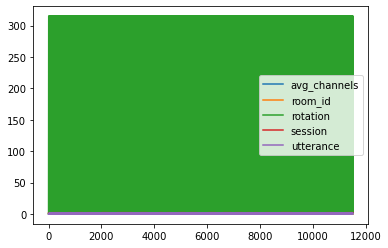

In [25]:
df.plot()